In [1]:
import sys
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')
from fscoreai.utils import sigmoid
import sample_data.sample_data

from sklearn.preprocessing import normalize
import sklearn.linear_model

## Data

In [2]:
X, y = sample_data.sample_data.kc_house_data()
X.shape, y.shape

((21613, 2), (21613, 1))

## Model

In [3]:
class GeneralizedLinearModel():
    def __init__(self):
        self.weights_ = None
        self.coef_ = None
        self.intercept_ = None
        self.costs = []
        
    def initialize_weights(self, n_features):
        self.weights_ = np.random.randn(n_features + 1, 1)

In [4]:
class LinearRegression(GeneralizedLinearModel):
    def __init__(self):
        super().__init__()
        
    def optimize(self, n_epochs, learning_rate, X, y, tolerance=1e-04):
        for _ in tqdm(range(n_epochs)):
            y_pred = np.dot(X, self.weights_)
            error = y - y_pred
            cost = (1 / self.n_features) * np.dot(error.T, error).reshape(-1)
            self.costs.append(cost)
            dLdw = - 2 * np.dot(X.T, error)
            if np.all(np.abs(dLdw) <= tolerance):
                return
            self.weights_ = self.weights_ - (learning_rate * dLdw)
        
    def fit(self, X, y, learning_rate=1e-5, n_epochs=50):
        '''
        Assert shapes
        hstack column of ones to X
        Initialize weights
        Iterate over each epoch
        Find dL/dw
        Update weights
        Store intercept and bias values
        '''
        y = y.reshape(-1, 1)
        self.n_samples, self.n_features = X.shape
        X = np.hstack((np.ones((self.n_samples, 1)), X))
        self.initialize_weights(self.n_features)
        self.optimize(n_epochs, learning_rate, X, y)
        self.intercept_ = self.weights_[0]
        self.coef_ = self.weights_[1:]
        return

    def fit_closed_form(self, X, y):
        n, d = X.shape
        X = np.hstack((np.ones((n, 1)), X))
        self.weights_ = np.linalg.inv(X.T@X) @ (X.T@y)
        
        self.intercept_ = self.weights_[0]
        self.coef_ = self.weights_[1:]
        return

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.dot(X, self.weights_)

## Inference

  0%|          | 0/1000 [00:00<?, ?it/s]

-------------------Model 1: Gradient Descent------------------
[9994.94792617] [[283.21100392]
 [-30.38110389]]





-------------------Model 2: Closed-form------------------
[4545840.77456427] [[  304.56520719]
 [-2353.73193233]]





-------------------Model 3: Scikit-Learn------------------
[4545840.77456598] [[  304.56520719 -2353.73193233]]


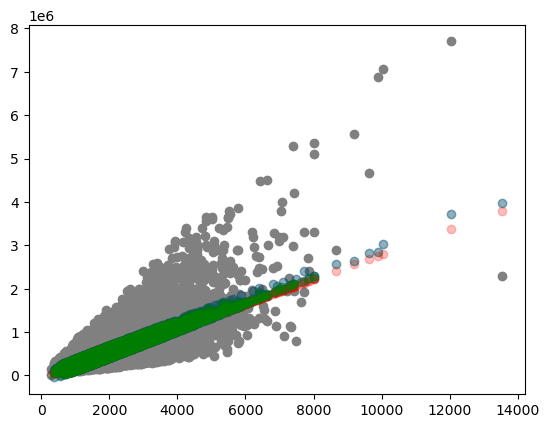

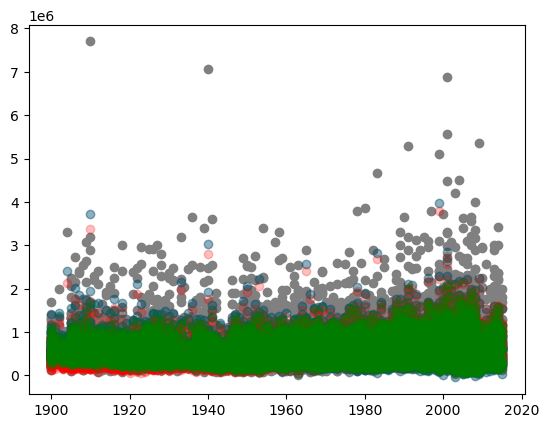

In [5]:
model_1 = LinearRegression()
model_2 = LinearRegression()
model_sklearn = sklearn.linear_model.LinearRegression()

model_1.fit(X, y, learning_rate=1e-12, n_epochs=1000)
model_2.fit_closed_form(X, y)
model_sklearn.fit(X, y)

y_pred_1 = model_1.predict(X)
y_pred_2 = model_2.predict(X)
y_pred_sklearn = model_sklearn.predict(X)

print("-------------------Model 1: Gradient Descent------------------")
print(model_1.intercept_, model_1.coef_)
print("\n\n\n\n")

print("-------------------Model 2: Closed-form------------------")
print(model_2.intercept_, model_2.coef_)
print("\n\n\n\n")

print("-------------------Model 3: Scikit-Learn------------------")
print(model_sklearn.intercept_, model_sklearn.coef_)


plt.scatter(X[:, 0], y, c='grey')
plt.scatter(X[:, 0], y_pred_sklearn, c='blue', alpha=0.25)
plt.scatter(X[:, 0], y_pred_1, c='red', alpha=0.25)
plt.scatter(X[:, 0], y_pred_2, c='green', alpha=0.25)

plt.show()

plt.scatter(X[:, 1], y, c='grey')
plt.scatter(X[:, 1], y_pred_sklearn, c='blue', alpha=0.25)
plt.scatter(X[:, 1], y_pred_1, c='red', alpha=0.25)
plt.scatter(X[:, 1], y_pred_2, c='green', alpha=0.25)

plt.show()

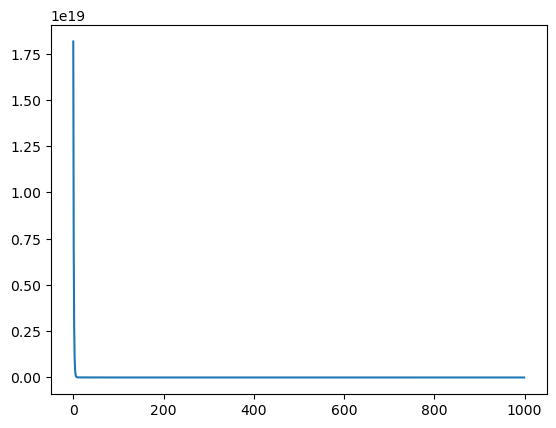

In [6]:
costs = np.array(model_1.costs)
plt.plot(model_1.costs)
plt.show()